<a href="https://colab.research.google.com/github/Dlogical23/capstone/blob/main/ClassifyEperimentationCap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*This is the prime data set

SIFT is an algorithm that helps locate the local features in an image, commonly known as the 'keypoints' of the image. These keypoints are scale & rotation invariants that can be used for various computer vision applications, like image matching, object detection, scene detection, etc.

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

In [ ]:
import tarfile

# Path to your tar.gz file
file_path = '/content/drive/MyDrive/SIFT10M/SIFT10M.tar.gz'

# Path to the directory where you want to extract the files
extract_path = '/content/drive/MyDrive/SIFT10M'

# Open the tar.gz file
with tarfile.open(file_path, 'r:gz') as tar_ref:
    # Extract all files to the specified directory
    tar_ref.extractall(extract_path)

[SIFT10M dataset](https://www.archive.ics.uci.edu/dataset/353/sift10m)

In [ ]:
# prompt: inspect the first 5 rows of the .tar.gz file

from google.colab import drive
import tarfile
import os

# Now inspect the first 5 rows (assuming they're in a text file)
# Replace 'your_extracted_file.txt' with the actual name of your file
extracted_file_path = os.path.join(extract_path, 'your_extracted_file.txt')  # Replace with actual file name
try:
    with open('/content/drive/MyDrive/SIFT10M/SIFT10M.tar.gz', 'r') as f:
        for i in range(5):
            line = f.readline()
            if not line:
                break  # Stop if the file has fewer than 5 lines
            print(line.strip()) # Print the line, removing leading/trailing whitespace
except FileNotFoundError:
    print(f"File not found at: {'/content/drive/MyDrive/SIFT10M/SIFT10M.tar.gz'}")
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
# Now inspect the first 5 rows (assuming they're in a text file)
extracted_file_path = os.path.join(extract_path, '/content/drive/MyDrive/SIFT10M/SIFT10M.tar.gz')  # Replace with actual file name
try:
    with open('/content/drive/MyDrive/SIFT10M/SIFT10M.tar.gz', 'r') as f:
        for i in range(5):
            line = f.readline()
            if not line:
                break  # Stop if the file has fewer than 5 lines
            print(line.strip()) # Print the line, removing leading/trailing whitespace
except FileNotFoundError:
    print(f"File not found at: {'/content/drive/MyDrive/SIFT10M/SIFT10M.tar.gz'}")
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
import os

# Define the path to the tar.gz file
tar_path = "/content/drive/MyDrive/SIFT10M/SIFT10M.tar.gz"

# Define the extraction path
extract_path = "/content/drive/MyDrive/SIFT10M/extracted/"

# Ensure the extraction path exists
os.makedirs(extract_path, exist_ok=True)

# Extract the tar.gz file
try:
    with tarfile.open(tar_path, "r:gz") as tar:
        tar.extractall(path=extract_path)
        print(f"Extracted files to: {extract_path}")
except Exception as e:
    print(f"An error occurred while extracting: {e}")

# List the extracted files
extracted_files = os.listdir(extract_path)
print("Extracted files:", extracted_files)

# Read the first 5 lines from one of the extracted text files (assuming a .txt or .csv file exists)
for file in extracted_files:
    file_path = os.path.join(extract_path, file)

    # Check if it's a text file before reading
    if file.endswith(".txt") or file.endswith(".csv"):
        try:
            with open(file_path, "r", encoding="utf-8", errors="replace") as f:
                print("\nFirst 5 lines of", file_path)
                for _ in range(5):
                    print(f.readline().strip())
            break  # Stop after reading the first valid file
        except Exception as e:
            print(f"Could not read {file}: {e}")

In [ ]:
import h5py

# Load the .mat file using h5py
file_path = '/content/drive/MyDrive/SIFT10M/extracted/SIFT10M/SIFT10Mfeatures.mat'
with h5py.File(file_path, 'r') as file:
    # Access the correct dataset. 'fea' is a common dataset name in .mat files.
    # If 'fea' doesn't exist, inspect the file's contents to find the correct name
    features = file['fea'][:]

# View the first 5 rows
print(features[:5])

[[ 55  23  21  15  43 100 116  63 101  17   5   1   1  12  60 117  33  80
   19   3   3  15  53  48  46  46   3   0   2   8  35  57  47  39  51  19
   14  19  70  54  73  29   9   2   3  60 117  75 117  48   8   3  14  31
  117 117  21  10   1   2  32  74 117  69  21   2   2  10  72  36  78  52
   72  36  55   8   7  26  57  68 117  61  33   4  24   8   7  26  19   4
    0   2  59  32   8   5   5   0   0   1  27   2   0   7   8   2   1   0
    0   0   0  10   0   1   1   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   2  10  41  22   5   0   0   0  50 123  82  64
   28   0   0   8  53  73  95  77  40   1   0   2   7  16   1   1   2   0
    0   0   0   2 115  51  28   0   0   0   1  37 130 119  41   0   0   0
    0  40  64  85  63  28   2   0   7  23   1   3   3   0   0   0   0   3
   54  65  65   0   0   0   2  57 130  57  11   0   0   0   9 128  98  24
   13  13   1   0  22  79   4   0   0   0   0   0   0   4  73   1   0   0
    0   1   7  82 108   2  

In [ ]:
import h5py

file_path = "SIFT10Mfeatures.mat"  # Ensure this is the correct path

with h5py.File('/content/drive/MyDrive/SIFT10M/extracted/SIFT10M/SIFT10Mfeatures.mat', 'r') as file:
    print("Available datasets in the file:")
    print(list(file.keys()))  # List all dataset names


In [ ]:
# prompt: Count the frequency of the positive target

import h5py
import numpy as np

file_path = '/content/drive/MyDrive/SIFT10M/extracted/SIFT10M/SIFT10Mfeatures.mat'

with h5py.File(file_path, 'r') as file:
    # Access the correct dataset.  'fea' is used based on previous code.
    #  You may need to change this if the actual name is different.
    features = file['fea'][:]

# Count the frequency of positive targets. Assuming the target is the first element of each feature.
positive_targets = np.sum(features[:, 0] > 0) #counts where first element is greater than zero

print(f"Number of positive targets: {positive_targets}")


In [ ]:
# prompt: Summary statistics for features

import h5py
import numpy as np

file_path = '/content/drive/MyDrive/SIFT10M/extracted/SIFT10M/SIFT10Mfeatures.mat'

with h5py.File(file_path, 'r') as file:
    features = file['fea'][:]



In [ ]:
import numpy as np

#Calculate summary statistics
mean_values = np.mean(features, axis=0)
min_values = np.min(features, axis=0)
max_values = np.max(features, axis=0)
median_values = np.median(features, axis=0)

print("Summary Statistics:")
print("Mean:", mean_values)
print("Minimum:", min_values)
print("Maximum:", max_values)
print("Median:", median_values)

In [ ]:
# prompt: Pairplot for the first few features and the target

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'features' is your NumPy array with the data
# and the target variable is the first column (features[:, 0])

# Select the first few features (e.g., the first 5) for the pairplot
num_features_to_plot = 5  # You can change this
features_to_plot = features[:, :num_features_to_plot]

# Create a DataFrame for easier plotting with seaborn
import pandas as pd
df = pd.DataFrame(features_to_plot)
df['target'] = features[:, 0]  # Assuming the target variable is in the first column


# Create the pairplot
sns.pairplot(df, vars=df.columns[:-1], hue='target') #hue='target' for coloring points based on target
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'features' is your NumPy array with the data
# and the target variable is the first column (features[:, 0])

# Select the first few features (e.g., the first 5) for the pairplot
num_features_to_plot = 5  # You can change this
features_to_plot = features[:, :num_features_to_plot]

In [ ]:
# Create a DataFrame for easier plotting with seaborn
import pandas as pd
df = pd.DataFrame(features_to_plot)
df['target'] = features[:, 0]  # Assuming the target variable is in the first column


# Create the pairplot
sns.pairplot(df, vars=df.columns[:-1], hue='target') #hue='target' for coloring points based on target
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'features' is your NumPy array with the data
# and the target variable is the first column (features[:, 0])

# Select the first few features (e.g., the first 5) for the pairplot
num_features_to_plot = 5  # You can change this
features_to_plot = features[:, :num_features_to_plot]

# Select the first few features (e.g., the first 5) for the pairplot
num_features_to_plot = 5  # You can change this
features_to_plot = features[:, :num_features_to_plot]

import pandas as pd
df = pd.DataFrame(features_to_plot)
df['target'] = features[:, 0]

In [ ]:
# Create the pairplot
sns.pairplot(df, vars=df.columns[:-1], hue='target') #hue='target' for coloring points based on target
plt.show()

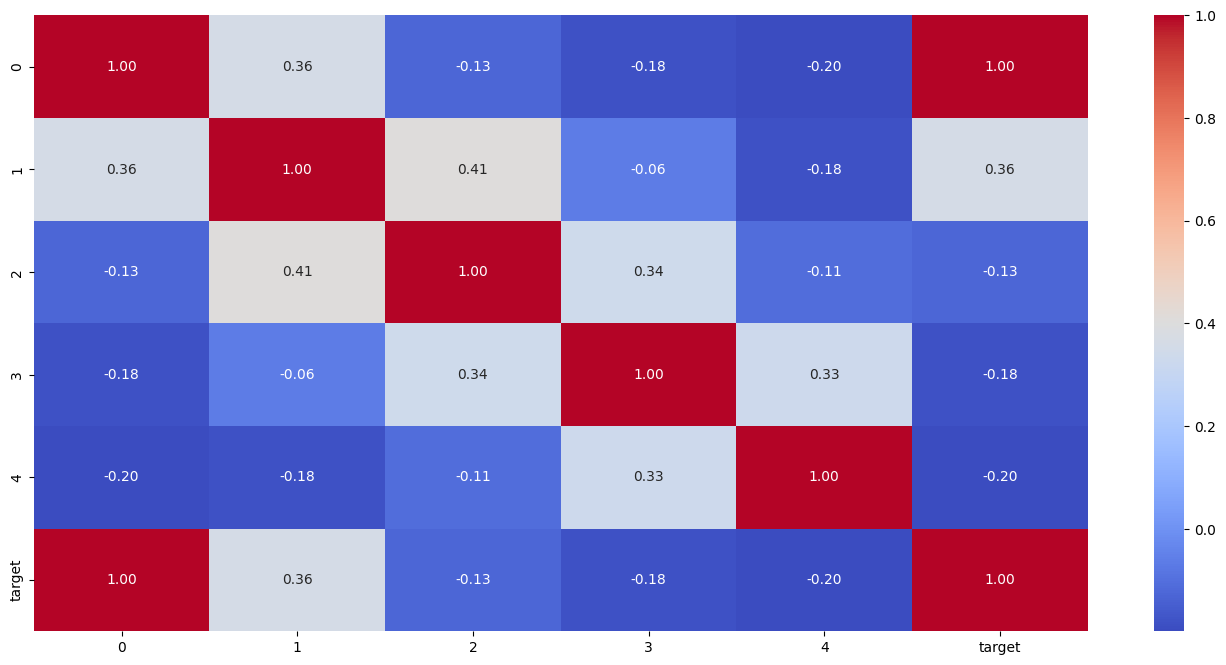

In [ ]:
import pandas as pd

# Correlation matrix
corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(17, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

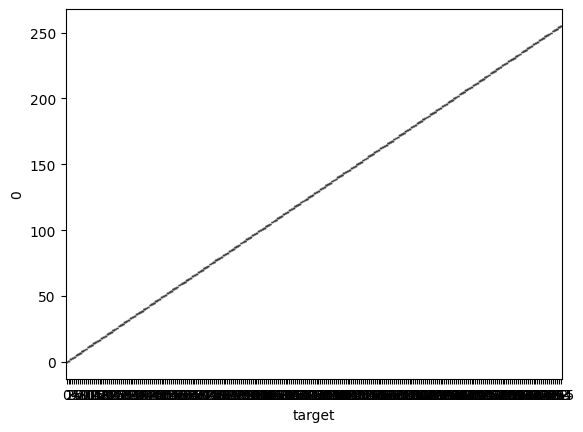

In [ ]:
# Boxplot for the first feature (column 0) grouped by 'target'
sns.boxplot(x='target', y=0, data=df)  # Use 0 instead of 'mean radius'
plt.show()